<a href="https://colab.research.google.com/github/kevinCortial/graphlearning/blob/main/preprocessing_Harvard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


       id            x            y
0    0910  2713.388794  2416.424561
1    6103  2614.369629  2386.631348
2    6106  2583.115845  2490.073730
3    6108  2595.237549  2421.645508
4    0806  2496.602661  2819.347656
..    ...          ...          ...
861  3005  1769.458618  2122.589111
862  3913  1368.636841  2019.038025
863  3001  1397.348389  1952.072571
864  2941  1278.896362  2263.202148
865  2939  1554.937500  2808.760742

[866 rows x 3 columns]
     source  strength target
0      1602  0.536056   2309
1      1602  0.587606   3208
2      1602  0.544331   2106
3      1602  0.616316   2202
4      1602  0.518476   3921
...     ...       ...    ...
2527   2710  0.573539   3102
2528   2814  0.624391   3102
2529   2814  0.587945   2905
2530   2709  0.455420   2814
2531   2708  0.408248   8404

[2532 rows x 3 columns]


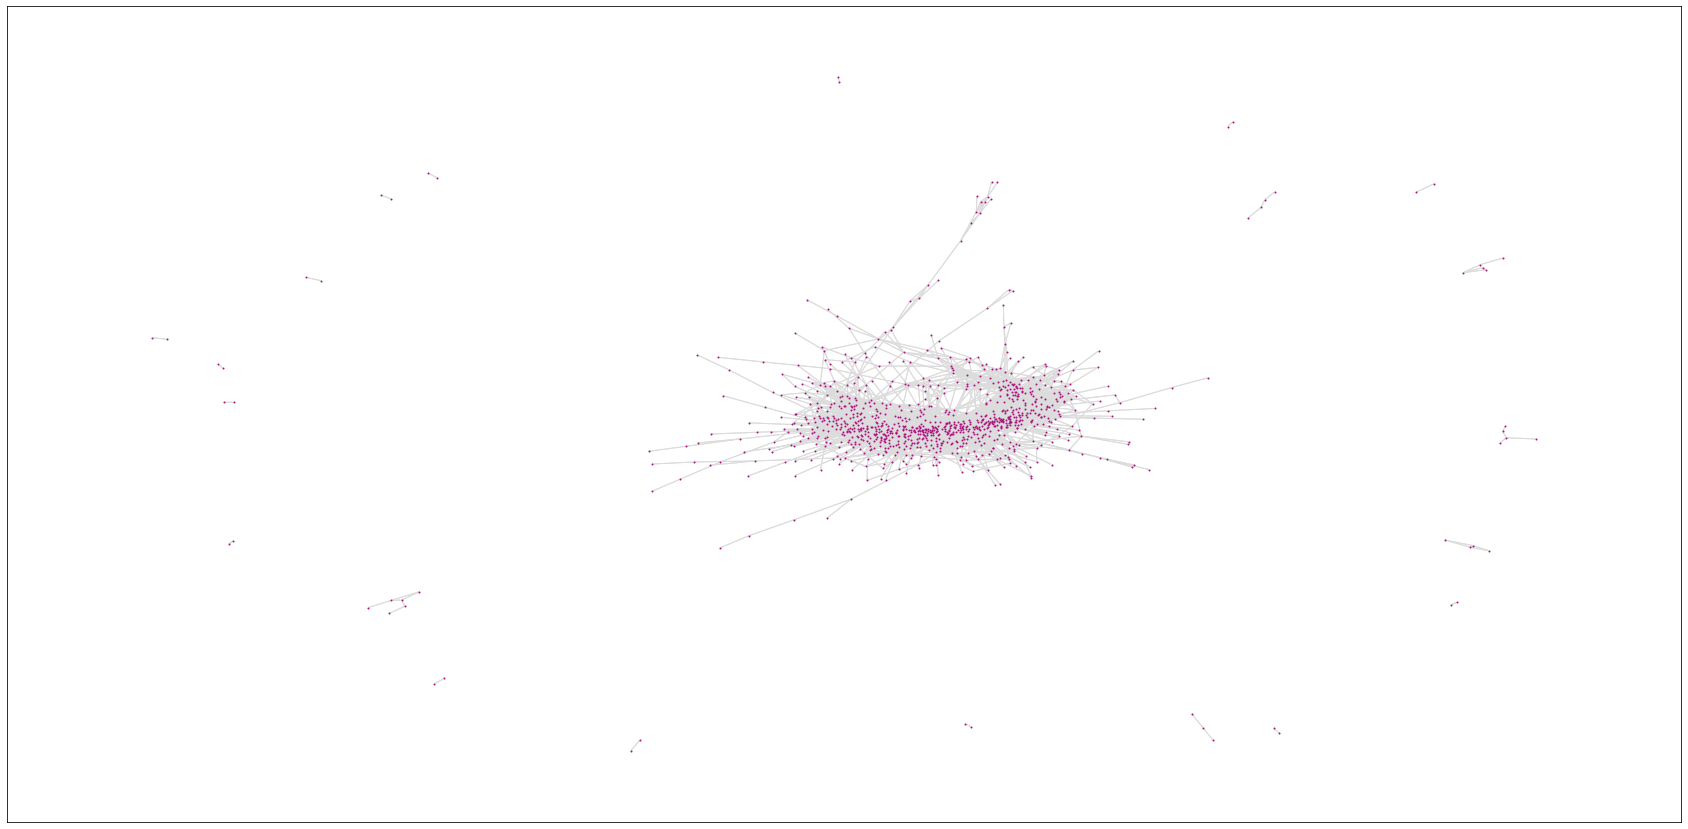

In [2]:
import json
from pandas.io.json import json_normalize
import pandas as pd
with open('/content/drive/MyDrive/ColabNotebooks/network_hs92_4digit.json') as json_data:
    data = json.load(json_data)
df = pd.DataFrame(data['nodes'])
print(df)
df2 = pd.DataFrame(data['edges'])
print(df2)




import networkx as nx
import matplotlib.pyplot as plt
def get_graph_from_dataframe(dataframe):
  # We only need the three needed columns
  dataframe = dataframe[["commoditycode_1", "commoditycode_2", "proximity"]]
  dataframe.columns = ['source', 'dest', 'coef']
  # We delete every line that has a weight of zero
  data_no_zero = dataframe[dataframe['coef'] >= 0.5]
  dataframe = pd.crosstab(data_no_zero.source, data_no_zero.dest, dropna=False)
  # At this point we can transform the dataframe intro an adjacency matrix
  idx = dataframe.columns.union(dataframe.index)
  dataframe = dataframe.reindex(index = idx, columns=idx, fill_value=0)
  G = nx.from_pandas_adjacency(dataframe, create_using = nx.DiGraph())
  plt.figure(figsize=(30, 15))

  nx.draw_networkx(G, node_size=1, with_labels=False, arrowsize=1, node_color='#ac1480', edge_color='gainsboro')
  plt.show()

  return dataframe


original_df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/hs92_proximities.csv', delimiter = ",", dtype={"commoditycode_1": str, "commoditycode_2": str})
df = get_graph_from_dataframe(original_df)